<div align="center">
  <h1>Лабораторная работа №1</h1>
</div>

<div align="center">
  <h2>Отчет о выполнении</h2>
</div>

<div align="right">
  <h3>Студента 3 курса 8 группы</h3>
  <h3>Добрицкого Артема</h3>
</div>

<div align="center">
  <h2>Содержание</h2>
</div>

**Расчет описательных характеристик**
   1. Минимум,максимум,размах
   2. Среднее,дисперсия,стандартное отклонение
   3. Медиана,квантили

**Визуализация распределений**
   1. Столбчатая диаграмма
   2. BoxPlot

**Кореляционный анализ**

### Расчет описательных статистик

1. Минимум,максимум,размах

In [2]:
from sys import displayhook
from unittest import result

import numpy as np
import pandas as pd

file = pd.read_csv("../data/Annual 2005-2011.csv")
self_made_stats = []
for col in file.columns:
    self_made_stats.append({
        "Столбец":col,
        "Минимум":min(file[col].dropna().tolist()),
        "Максимум":max(file[col].dropna().tolist()),
        "Размах": max(file[col].dropna().tolist()) - min(file[col].dropna().tolist()),
        "Асимметрия": file[col].skew(),
        "Эксцесс": file[col].kurt(),
    })
display(pd.DataFrame(self_made_stats))



,Столбец,Минимум,Максимум,Размах,Асимметрия,Эксцесс
0,empl_num,10.000000,28650.000000,28640.000000,5.516686,39.396740
1,k1,0.248322,18.020148,17.771826,3.385204,16.580257
2,k2,0.000000,7.029135,7.029135,4.990825,35.883102
3,k3,0.008329,11.187699,11.179370,3.428045,17.473216
4,k4,-4.569874,0.935935,5.505809,-2.322777,9.356913
5,k5,0.009944,1.083702,1.073758,0.561709,-0.265989
6,k6,0.000000,1.000000,1.000000,1.008406,0.449773
7,k7,0.000000,1.000000,1.000000,1.507845,1.645573
8,k8,0.053766,0.990056,0.936290,-0.525526,-0.378203
9,k9,0.059320,199.605839,199.546520,7.700774,141.337159


2. Среднее,дисперсия,стандартное отклонение

In [3]:
def M(array):
    sum = 0
    for i in range(len(array)):
        sum += array[i]
    return sum / len(array)
def D(array):
    mean = M(array)
    res = 0
    for i in range(len(array)):
        res += (array[i] - mean)**2
    return res/(len(array)-1)
def SD(array):
    return D(array)**0.5

self_made_stats = []
for col in file.columns:
    self_made_stats.append({
        "Cтолбец": col,
        "Среднее": M(file[col].dropna().tolist()),
        "Дисперсия": D(file[col].dropna().tolist()),
        "Стандартное отклонение":SD(file[col].dropna().tolist())
    })
display(pd.DataFrame(self_made_stats))



,Cтолбец,Среднее,Дисперсия,Стандартное отклонение
0,empl_num,1220.773284,6.535214e+06,2556.406482
1,k1,2.002089,2.856275e+00,1.690052
2,k2,0.238018,2.680105e-01,0.517697
3,k3,0.825098,8.432594e-01,0.918292
4,k4,0.038115,3.908187e-01,0.625155
5,k5,0.346330,3.920708e-02,0.198008
6,k6,0.238031,4.540896e-02,0.213094
7,k7,0.174212,4.984752e-02,0.223266
8,k8,0.655964,3.832761e-02,0.195774
9,k9,6.862756,6.309532e+01,7.943256


3. Медиана,квантили уровней 0.01, 0.05, 0.95, 0.99

In [4]:
table = []
for col in file.columns:
    table.append({
        "Столбец": col,
        "Квантиль уровня 0.01": file[col].quantile(0.01),
        "Квантиль уровня 0.05": file[col].quantile(0.05),
        "Медиана/Квантиль уровня 0.5": file[col].quantile(0.5),
        "Квантиль уровня 0.95": file[col].quantile(0.95),
        "Квантиль уровня 0.99": file[col].quantile(0.99),
        "Интерквартильный размах": file[col].quantile(0.75) - file[col].quantile(0.25),
    })
display(pd.DataFrame(table))

,Столбец,Квантиль уровня 0.01,Квантиль уровня 0.05,Медиана/Квантиль уровня 0.5,Квантиль уровня 0.95,Квантиль уровня 0.99,Интерквартильный размах
0,empl_num,36.940000,91.000000,473.000000,5152.400000,12526.780000,899.000000
1,k1,0.423381,0.663925,1.473859,5.258034,9.002944,1.140241
2,k2,0.000340,0.002725,0.055551,1.128667,2.636539,0.194450
3,k3,0.061415,0.124851,0.538349,2.544703,4.917381,0.623698
4,k4,-2.450093,-0.977473,0.148620,0.755809,0.881929,0.603576
5,k5,0.037373,0.068282,0.319908,0.712523,0.860138,0.294576
6,k6,0.000000,0.000000,0.185185,0.663608,0.859919,0.298250
7,k7,0.000000,0.000000,0.075676,0.674139,0.890017,0.267700
8,k8,0.160895,0.292537,0.681890,0.932723,0.962348,0.294955
9,k9,0.455832,1.048860,4.758963,19.642377,35.671475,5.655085


### Визуализация распределений

#### Столбчатая диаграмма

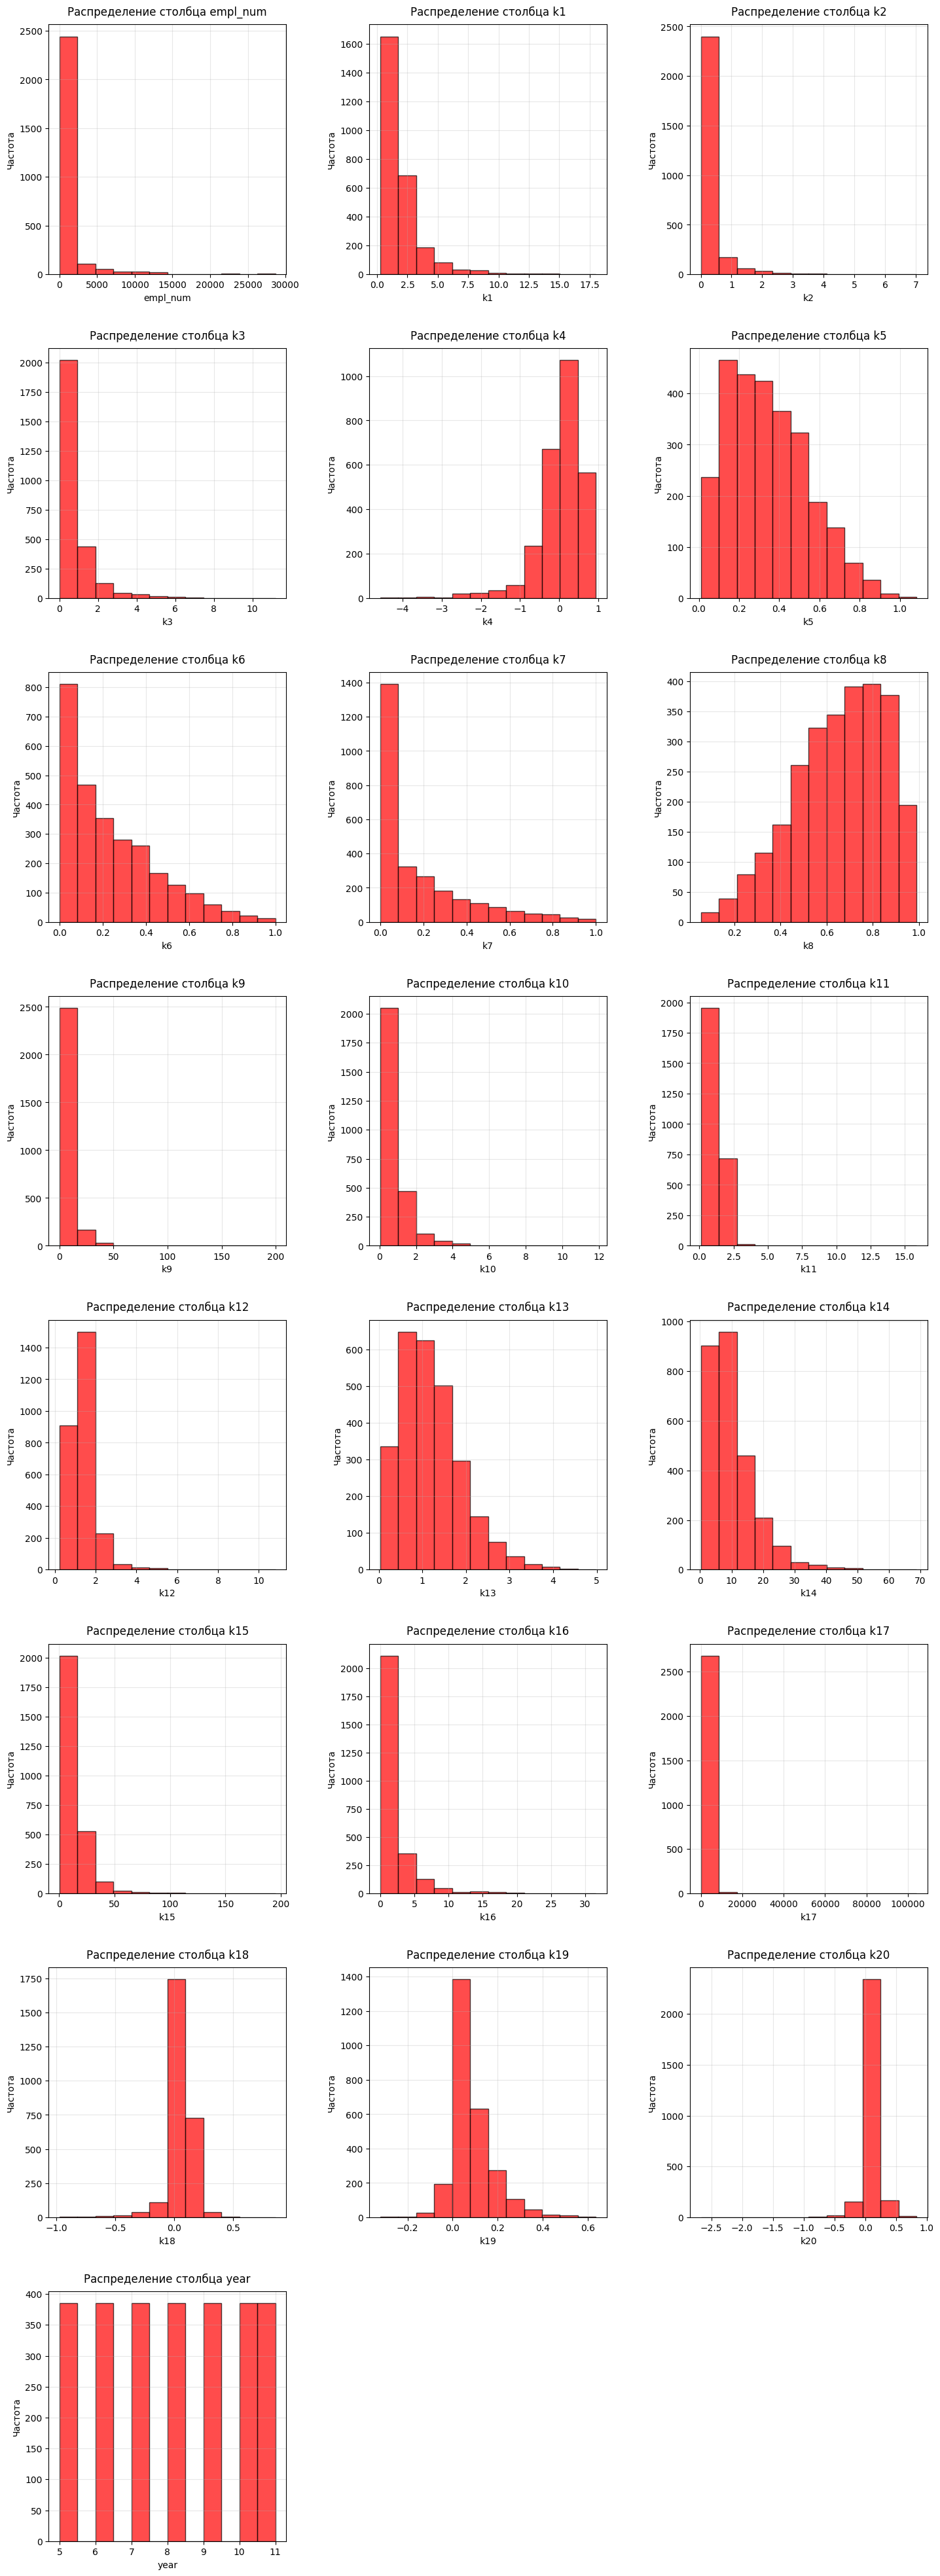

In [12]:
import math
from math import log2
import matplotlib.pyplot as plt

def get_bins(array):
    return math.ceil(log2(len(array)+1))

n_cols = len(file.columns)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(file.columns):
    axes[i].hist(file[col].dropna(), bins=get_bins(file[col].dropna()), color='red', edgecolor='black', alpha=0.7)

    axes[i].set_title(f"Распределение столбца {col}", fontsize=12, pad=10)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Частота", fontsize=10)
    axes[i].grid(alpha=0.3)

for j in range(len(file.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

как видно из визуализаций большинство из распределений это унимодальные ассиметричные распределения

#### BoxPlot

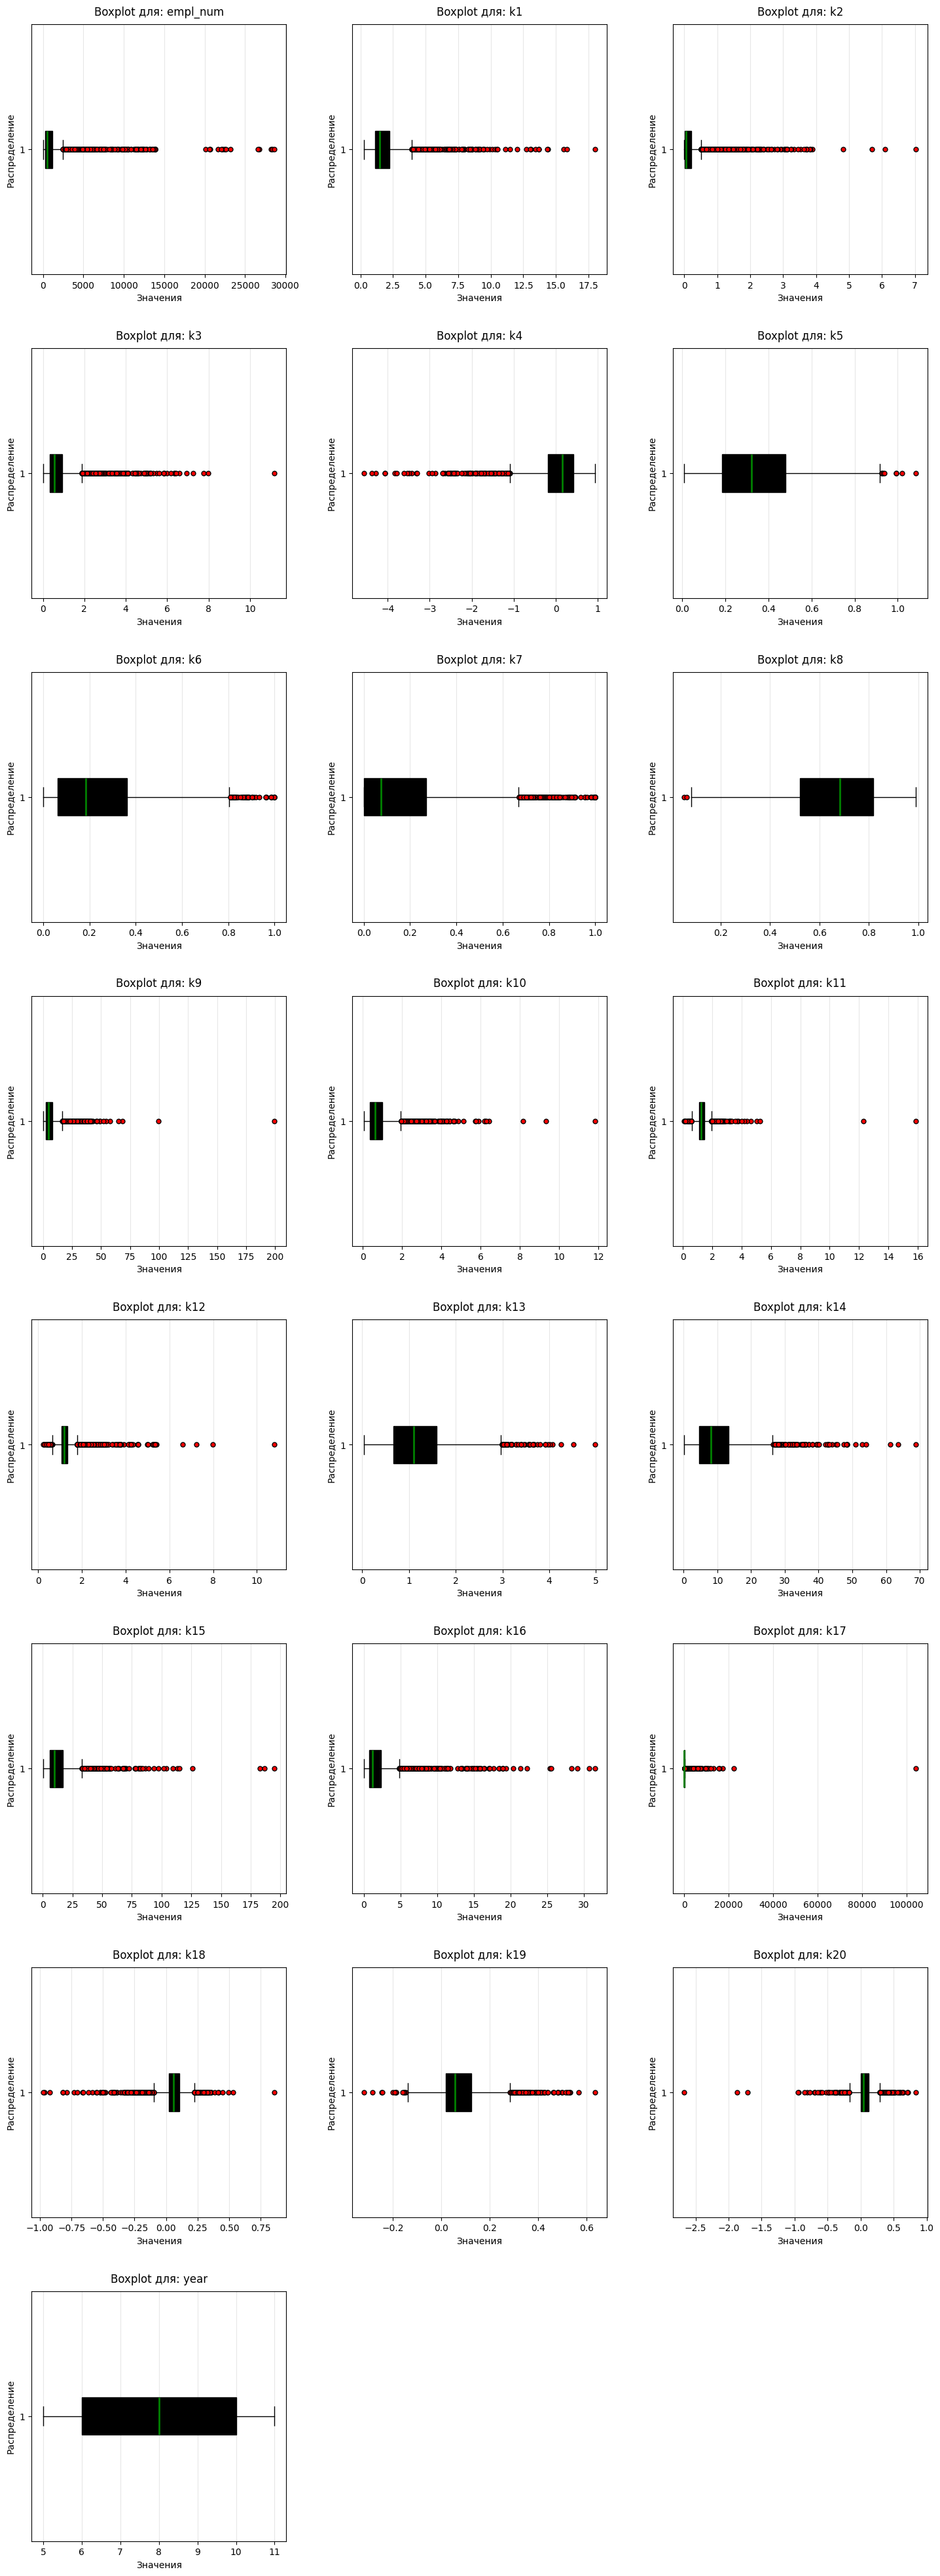

In [11]:
n_cols = len(file.columns)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(file.columns):
    axes[i].boxplot(file[col],
            vert=False,
            patch_artist=True,
            boxprops=dict(facecolor='black', color='black'),
            medianprops=dict(color='green', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

    axes[i].set_title(f'Boxplot для: {col}', fontsize=12, pad=10)
    axes[i].set_xlabel('Значения', fontsize=10)
    axes[i].set_ylabel('Распределение', fontsize=10)
    axes[i].grid(axis='x', alpha=0.3)

for j in range(len(file.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

### Кореляционный анализ

*Таблица парных корреляций Пирсона*

In [7]:
file.dropna()
corr_pirs = file.corr(method='pearson')
display(corr_pirs)

,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
empl_num,1.000000,0.035067,0.039541,0.057712,0.008973,-0.045174,-0.148917,-0.063621,0.044002,0.014358,...,0.005375,-0.062109,0.002358,-0.067429,-0.087362,0.056114,0.096272,0.019471,0.017363,-0.001502
k1,0.035067,1.000000,0.732549,0.883032,0.452525,-0.412064,-0.113531,-0.248283,0.405975,0.557893,...,0.038813,0.048098,0.540829,0.023106,-0.256268,0.004299,0.226630,0.313667,0.187206,0.114381
k2,0.039541,0.732549,1.000000,0.812905,0.327937,-0.318344,-0.123917,-0.208498,0.317151,0.368025,...,0.051065,0.040822,0.374173,0.092893,-0.129728,0.013061,0.202906,0.317995,0.185868,0.077838
k3,0.057712,0.883032,0.812905,1.000000,0.398493,-0.355593,-0.110743,-0.227242,0.350851,0.510083,...,0.068067,0.077963,0.492752,-0.083706,-0.303649,0.016845,0.236955,0.344531,0.213435,0.116602
k4,0.008973,0.452525,0.327937,0.398493,1.000000,-0.557490,-0.090429,-0.263460,0.556975,0.237392,...,-0.077811,0.279167,0.338707,0.064928,-0.264211,0.016276,0.415230,0.441954,0.366759,0.010729
k5,-0.045174,-0.412064,-0.318344,-0.355593,-0.557490,1.000000,0.036943,0.166313,-0.996378,-0.488575,...,0.053309,0.025730,-0.319249,-0.234310,0.054876,-0.047257,-0.178914,-0.245414,-0.152431,0.040350
k6,-0.148917,-0.113531,-0.123917,-0.110743,-0.090429,0.036943,1.000000,0.391975,-0.032126,-0.032287,...,-0.147884,-0.130656,-0.154374,-0.073267,0.075172,-0.014597,-0.243185,-0.225752,-0.219151,-0.116653
k7,-0.063621,-0.248283,-0.208498,-0.227242,-0.263460,0.166313,0.391975,1.000000,-0.161284,-0.133519,...,-0.108884,-0.245651,-0.325492,-0.141712,0.152253,0.007264,-0.292535,-0.329748,-0.279798,-0.084229
k8,0.044002,0.405975,0.317151,0.350851,0.556975,-0.996378,-0.032126,-0.161284,1.000000,0.489973,...,-0.055908,-0.031170,0.316123,0.235426,-0.049662,0.046653,0.176937,0.241966,0.151142,-0.055604
k9,0.014358,0.557893,0.368025,0.510083,0.237392,-0.488575,-0.032287,-0.133519,0.489973,1.000000,...,0.014529,-0.225022,0.540732,0.047573,-0.203250,0.008074,0.065476,-0.003780,-0.015175,0.023085


*Нахождение сильнокоррелирующих пар*

In [8]:
crit_value = 0.5
result_set = []
for i,col1 in enumerate(corr_pirs.columns):
    for j,col2 in enumerate(corr_pirs.columns):
        if i<j:
            if abs(corr_pirs.loc[col1, col2])>crit_value:
                result_set.append((col1, col2,corr_pirs.loc[col1, col2]))
strong_corr_df = pd.DataFrame(result_set, columns=['Column 1', 'Column 2', 'Pearson r'])
display(strong_corr_df)


,Column 1,Column 2,Pearson r
0,k1,k2,0.732549
1,k1,k3,0.883032
2,k1,k9,0.557893
3,k1,k14,0.540829
4,k2,k3,0.812905
5,k3,k9,0.510083
6,k4,k5,-0.557490
7,k4,k8,0.556975
8,k5,k8,-0.996378
9,k9,k14,0.540732


*Таблица сильнокоррелирующих пар*
Теперь надо проверить статистическую значимость этих пар

In [13]:
from scipy.stats import pearsonr
stat_proved = []
for col in result_set:
    r,p = pearsonr(file[col[0]], file[col[1]])
    if  p<0.05:
        stat_proved.append(col)
display(pd.DataFrame(stat_proved,columns=['Переменная 1', 'Переменная 2', 'Корреляция Пирсона']))

,Переменная 1,Переменная 2,Корреляция Пирсона
0,k1,k2,0.732549
1,k1,k3,0.883032
2,k1,k9,0.557893
3,k1,k14,0.540829
4,k2,k3,0.812905
5,k3,k9,0.510083
6,k4,k5,-0.557490
7,k4,k8,0.556975
8,k5,k8,-0.996378
9,k9,k14,0.540732


*Таблица статистически значимых корреляций*

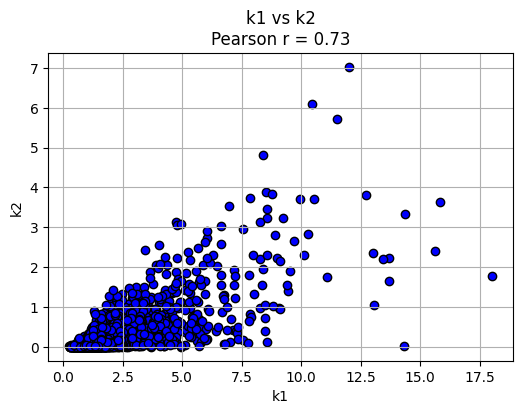

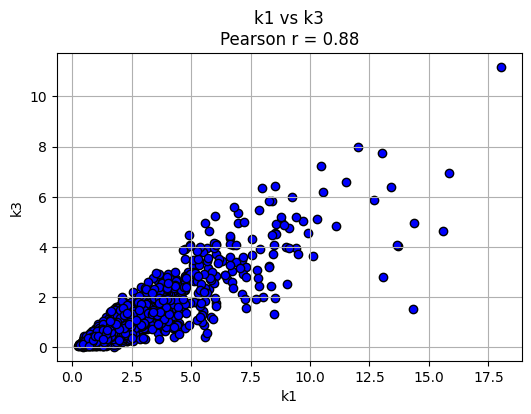

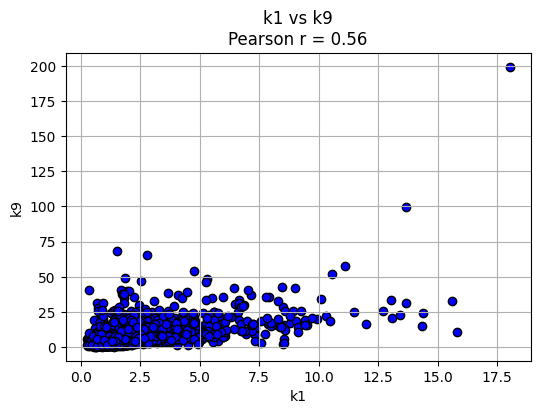

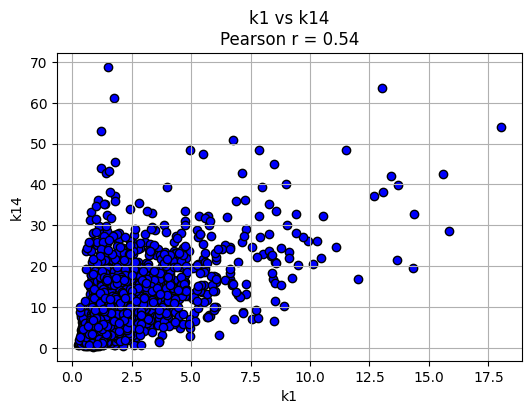

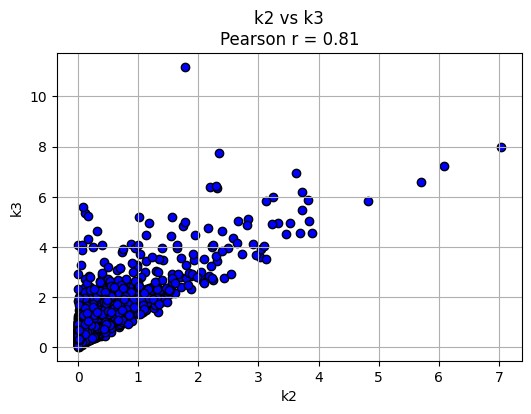

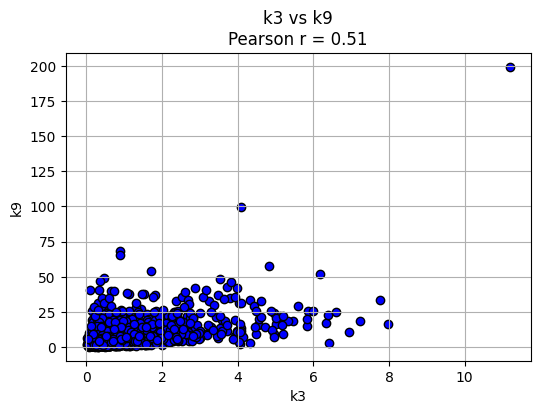

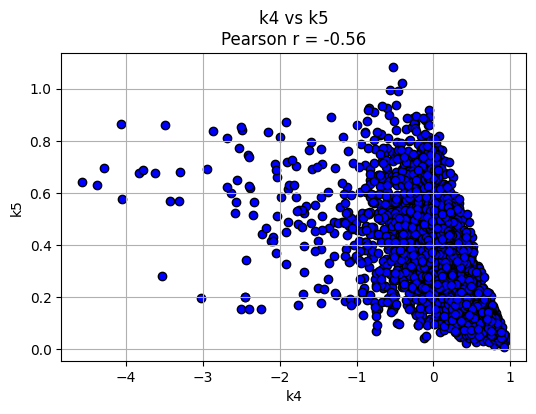

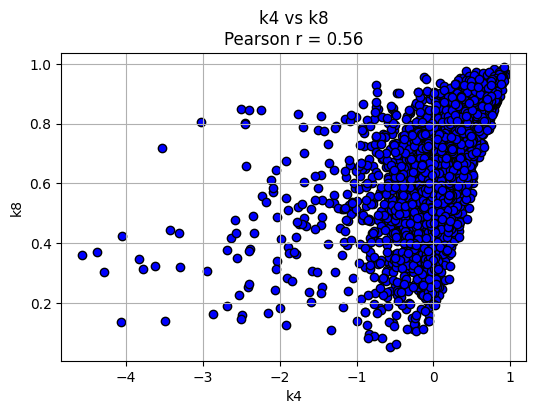

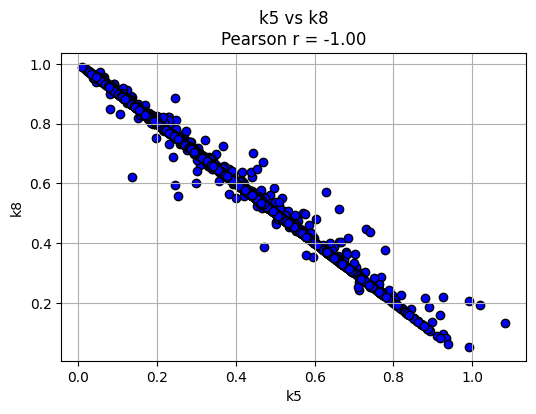

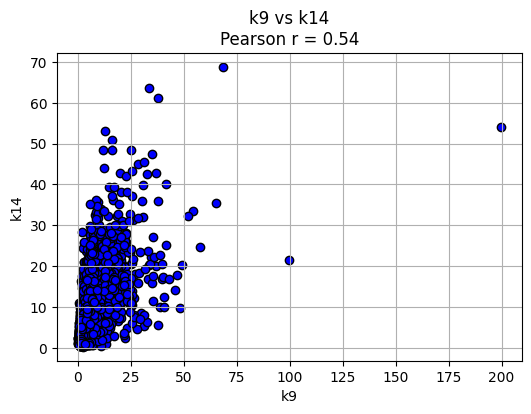

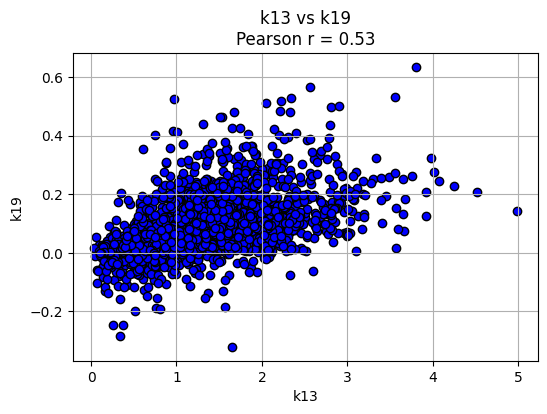

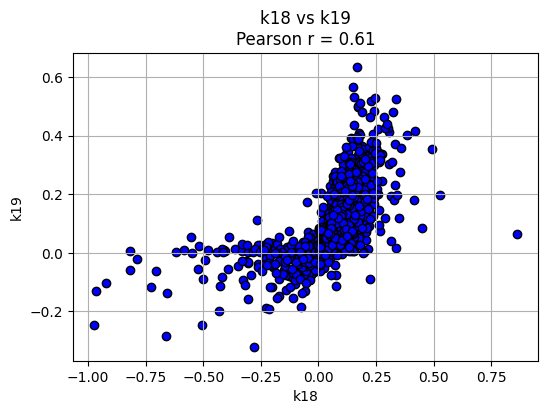

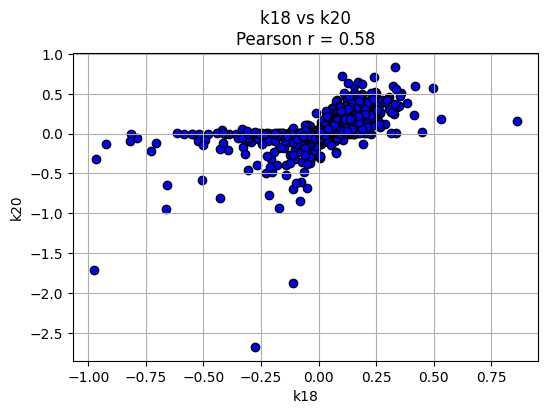

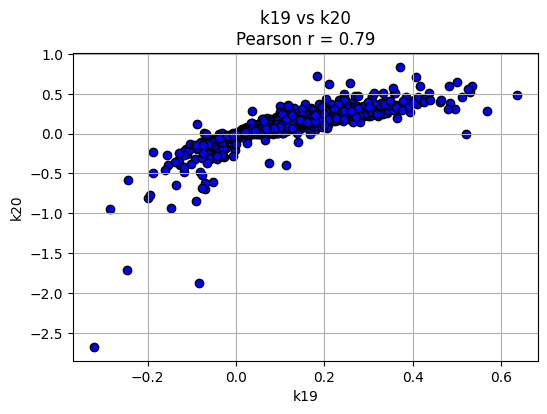

In [10]:

for item in stat_proved:
    col1 = item[0]
    col2 = item[1]
    r = item[2]

    plt.figure(figsize=(6,4))
    plt.scatter(file[col1], file[col2], color='blue', edgecolor='black')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"{col1} vs {col2}\nPearson r = {r:.2f}")
    plt.grid(True)
    plt.show()

Из данных диаграмм видна очень сильная зависимость между параметрами *k5* и *k8*,значит между ними есть некоторая линейная зависимость, следовательно *k8* линейно выражается через *k5* и k8 можно исключить из рассмотрения